# Logistic Regression

The purpose of this is to review Python syntax by fitting
a logistic regression over simulated data.

In [40]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

### Data Generating Process

In [41]:
def inverse_logit(x):
    return(1 / (1 + np.exp(-x)))

In [43]:
np.random.seed(123)
X1 = np.random.normal(1,3,size=10000)
X2 = np.random.normal(-3,1,size=10000)
Z = 3 + 5*X1 - 2*X2
probs = inverse_logit(Z)
y = np.random.binomial(size=10000,n=1,p=probs)

In [44]:
# Create pandas dataframe
df = pd.DataFrame(
    {'X1': X1,
     'X2': X2,
     'y': y        
    }
)

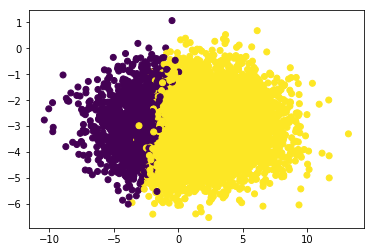

In [45]:
plt.scatter(X1,X2,c=y)
plt.show()

### Scikit Learn

In [46]:
lr = LogisticRegression(random_state=0, solver='lbfgs')

In [47]:
model = lr.fit(df[['X1','X2']],df['y'])

In [48]:
print(model.intercept_)
print(model.coef_)

[ 2.70301182]
[[ 4.59871689 -1.85300242]]


### From Scratch

Likelihood Function:

$L(\beta_0,\beta) = \prod_{i=1}^{n} p(x_i)^{y_i}(1-p(x_i))^{1-y_i}$  

Log-likelihood Function:

$l(\beta_0,\beta) = \sum_{i=1}^{n} y_i\log{p(x_i)} + (1-y_i)\log{(1-p(x_i))}$

Derivative of log-likelihood with respect to $\beta$

$\frac{\partial l}{\partial \beta_j} = \sum_{i=1}^{n}(y_i-p(x;\beta_0,\beta))x_{ij}$

Hessian Matrix (second derivative:

$H = XWX^T$

So need to solve:

$\Delta_k = (X^TW_kX)^{-1}X^T(y-p_k)$

Newton's Method for Numerical Optimization

$x_{n+1} = x_n - \Delta_k$



In [50]:
constant = np.repeat(1,10000)
X = np.vstack((constant,X1,X2)).T

In [51]:
beta = np.array([0,0,0])

In [52]:
delta=np.array([1,1,1])

In [53]:
i = 1
while delta.max() > 0.000001:
    i += 1
    probs = np.exp(np.dot(X,beta)) / (1 + np.exp(np.dot(X,beta)))
    W = np.diag(probs * (1-probs))
    delta = np.dot(inv(np.dot(np.dot(X.T,W),X)) , np.dot(X.T,(y-probs)))
    beta = beta + delta
    if i == 10000:
        break

In [54]:
beta

array([ 2.78741393,  4.79954004, -1.94190089])

### Tensorflow

In [55]:
sess = None

def reset_vars():
    sess.run(tf.global_variables_initializer())

def reset_tf():
    global sess
    if sess:
        sess.close()
    tf.reset_default_graph()
    sess = tf.Session()
    
reset_tf()

In [56]:
reset_tf()

W = tf.Variable(tf.zeros((3, 1)), name="weight")

x = tf.placeholder(shape=[None, 3], dtype=tf.float32, name='x')
y_label = tf.placeholder(shape=[None, 1], dtype=tf.float32, name='y_label')

y_ = tf.matmul(x, W)
loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=y_, labels=y_label))

In [57]:
predicted = tf.cast(tf.nn.sigmoid(y_) > 0.5, np.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_label), np.float32))

In [73]:
train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

reset_vars()

BATCH_SIZE = 100
for i in range(5000):
    j = np.random.choice(len(y), BATCH_SIZE, replace=False)
    sess.run(train, feed_dict={x: X[j,:], 
                               y_label: y[j].reshape(-1,1)})
    if i % 5 == 0:
        print(sess.run([loss, accuracy], feed_dict={x: X[j,:], 
                                                    y_label: y[j].reshape(-1, 1)}))

[0.57843995, 0.91000003]
[0.35882065, 0.89999998]
[0.27232933, 0.94]
[0.28823137, 0.91000003]
[0.26731494, 0.93000001]
[0.22786835, 0.95999998]
[0.19751903, 0.95999998]
[0.17635463, 1.0]
[0.18369915, 0.94]
[0.17848377, 0.94]
[0.14139788, 0.95999998]
[0.16558792, 0.97000003]
[0.1439212, 0.98000002]
[0.15014899, 0.95999998]
[0.1391899, 0.98000002]
[0.19923863, 0.93000001]
[0.16178456, 0.95999998]
[0.12852754, 0.98000002]
[0.13337323, 0.99000001]
[0.12119419, 0.99000001]
[0.10564211, 0.99000001]
[0.14753444, 0.97000003]
[0.12320586, 0.95999998]
[0.14763792, 0.95999998]
[0.12078162, 0.99000001]
[0.145419, 0.95999998]
[0.13152057, 0.97000003]
[0.13236599, 0.97000003]
[0.1201008, 0.97000003]
[0.14938021, 0.97000003]
[0.12874775, 0.97000003]
[0.1285748, 0.99000001]
[0.12973997, 0.95999998]
[0.081630856, 0.98000002]
[0.11257191, 0.97000003]
[0.11540897, 0.97000003]
[0.11986109, 0.94]
[0.084990747, 0.99000001]
[0.096979946, 0.98000002]
[0.10456934, 0.99000001]
[0.11045681, 0.97000003]
[0.099936

[0.050691005, 0.98000002]
[0.083762988, 0.95999998]
[0.080320895, 0.97000003]
[0.10875023, 0.94999999]
[0.0784733, 0.97000003]
[0.056687493, 0.99000001]
[0.049208336, 0.98000002]
[0.066107944, 0.99000001]
[0.047375344, 1.0]
[0.1276232, 0.91000003]
[0.085341007, 0.95999998]
[0.048739046, 0.98000002]
[0.072359227, 0.97000003]
[0.058835819, 0.98000002]
[0.046698883, 0.98000002]
[0.055799216, 0.98000002]
[0.066376142, 0.97000003]
[0.051387962, 0.98000002]
[0.025046494, 1.0]
[0.092972755, 0.94999999]
[0.056602627, 0.97000003]
[0.061323985, 0.97000003]
[0.10195212, 0.94999999]
[0.046140268, 0.99000001]
[0.061868463, 0.97000003]
[0.084722154, 0.95999998]
[0.040311698, 0.99000001]
[0.037364498, 0.99000001]
[0.079216458, 0.98000002]
[0.053822294, 0.99000001]
[0.073015206, 0.98000002]
[0.080962084, 0.98000002]
[0.062279399, 0.99000001]
[0.10111976, 0.95999998]
[0.059191838, 0.99000001]
[0.056893505, 0.99000001]
[0.083148845, 0.97000003]
[0.086229876, 0.94999999]
[0.032942265, 0.99000001]
[0.0369

[0.082508698, 0.98000002]
[0.075588085, 0.97000003]
[0.069631077, 0.95999998]
[0.09091793, 0.94999999]
[0.089785479, 0.94999999]
[0.035499286, 0.99000001]
[0.058546681, 0.98000002]
[0.043859534, 0.99000001]
[0.048891947, 0.98000002]
[0.039144486, 1.0]
[0.047850445, 0.99000001]
[0.065728001, 0.97000003]
[0.043920852, 0.98000002]
[0.041757032, 0.97000003]
[0.07081908, 0.98000002]
[0.052834988, 0.99000001]
[0.074499071, 0.97000003]
[0.037838154, 0.99000001]
[0.072924234, 0.95999998]
[0.053001571, 0.99000001]
[0.073686317, 0.98000002]
[0.087014802, 0.97000003]
[0.10288078, 0.95999998]
[0.031701509, 0.99000001]
[0.064275712, 0.97000003]
[0.027181379, 0.99000001]
[0.10044667, 0.94]
[0.08314494, 0.95999998]
[0.059513889, 0.99000001]
[0.088896662, 0.95999998]
[0.077074111, 0.95999998]
[0.034068428, 0.99000001]
[0.032606155, 1.0]
[0.054379586, 1.0]
[0.095673129, 0.94]
[0.033677489, 0.98000002]
[0.065705642, 0.98000002]
[0.016860053, 1.0]
[0.068593971, 0.99000001]
[0.055141523, 0.98000002]
[0.03

In [74]:
sess.run(W)

array([[ 1.23274708],
       [ 3.56341553],
       [-1.74103582]], dtype=float32)